In [19]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from keras import models
from keras import layers
import matplotlib.pyplot as plt

Verover de data. Het is een dataset van IMDB met filmrecensies. De labels zijn binair en geven aan of een film wel of geen aanrader is volgens de reviews.

In [20]:
from keras.datasets import imdb

(X_train, y_train), (X_test, y_test) = imdb.load_data(path="imdb.npz",
                                                      num_words=10000,
                                                      skip_top=0,
                                                      maxlen=None,
                                                      seed=42,
                                                      start_char=1,
                                                      oov_char=2,
                                                      index_from=3)

bekijk de geimporteerde data.

In [21]:
X_train[0:10]

array([list([1, 11, 4079, 11, 4, 1986, 745, 3304, 299, 1206, 590, 3029, 1042, 37, 47, 27, 1269, 2, 7637, 19, 6, 3586, 15, 1367, 3196, 17, 1002, 723, 1768, 2887, 757, 46, 4, 232, 1131, 39, 107, 3589, 11, 4, 4539, 198, 24, 4, 1834, 133, 4, 107, 7, 98, 413, 8911, 5835, 11, 35, 781, 8, 169, 4, 2179, 5, 259, 334, 3773, 8, 4, 3497, 10, 10, 17, 16, 3381, 46, 34, 101, 612, 7, 84, 18, 49, 282, 167, 2, 7173, 122, 24, 1414, 8, 177, 4, 392, 531, 19, 259, 15, 934, 40, 507, 39, 2, 260, 77, 8, 162, 5097, 121, 4, 65, 304, 273, 13, 70, 1276, 2, 8, 15, 745, 3304, 5, 27, 322, 2197, 2, 2, 70, 30, 2, 88, 17, 6, 3029, 1042, 29, 100, 30, 4943, 50, 21, 18, 148, 15, 26, 5980, 12, 152, 157, 10, 10, 21, 19, 3196, 46, 50, 5, 4, 1636, 112, 828, 6, 1003, 4, 162, 5097, 2, 517, 6, 2, 7, 4, 9527, 5593, 4, 351, 232, 385, 125, 6, 1693, 39, 2383, 5, 29, 69, 5593, 5670, 6, 162, 5097, 1567, 232, 256, 34, 718, 5612, 2980, 8, 6, 226, 762, 7, 2, 7830, 5, 517, 2, 6, 3242, 7, 4, 351, 232, 37, 9, 1861, 8, 123, 3196, 2, 5612, 188

Zoals je kunt zien bevat `X_train` vectoren met getallen. Elke vector staat voor een review. Elk getal staat voor een woord.

Met onderstaande code kun je een vector met getallen terugvertalen naar woorden. Run deze code.

In [22]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in X_train[0]])
decoded_review

"? in panic in the streets richard widmark plays u s navy doctor who has his week ? interrupted with a corpse that contains plague as cop paul douglas properly points out the guy died from two bullets in the chest that's not the issue here the two of them become unwilling partners in an effort to find the killers and anyone else exposed to the disease br br as was pointed out by any number of people for some reason director ? kazan did not bother to cast the small parts with anyone that sounds like they're from ? having been to new orleans where the story takes place i can personally ? to that richard widmark and his wife barbara ? ? can be ? because as a navy doctor he could be assigned there but for those that are natives it doesn't work br br but with plague out there and the news being kept a secret the new orleans ? starts a ? of the city's underworld the dead guy came off a ship from europe and he had underworld connections a new orleans wise guy played by jack palance jumps to a

In de tekst zie je een aantal vraagtekens. Een vraagteken staat in dit geval voor 'onbekend woord'.

De input is in deze vorm lastig te verwerken voor een neuraal netwerk. De getallen zijn categorische labels. Daarom gebruiken we One-hot-encoding. Helaas kan de `OneHotEncoder` uit sklearn niet overweg met deze input. Daarom maken we de input handmatig geschikt voor het neurale netwerk.

In [23]:
def vectorize_sequences(sequences, dimension=10000):
    # Maak een matrix van de vorm (len(sequences), dimension) met nullen
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # zet de juiste waarden in results[i] op 1
    return results

In [24]:
X_train = vectorize_sequences(X_train)
X_test = vectorize_sequences(X_test)

y_train = np.asarray(y_train).astype('float32')
y_test = np.asarray(y_test).astype('float32')

Controleer of het omzetten van de data goed gegaan is

In [25]:
# Controleer de vorm van de gevectoriseerde sequenties
print("Vorm van X_train:", X_train.shape)
print("Vorm van X_test:", X_test.shape)

# Controleer het gegevenstype van de labels
print("Gegevenstype van y_train:", y_train.dtype)
print("Gegevenstype van y_test:", y_test.dtype)


Vorm van X_train: (25000, 10000)
Vorm van X_test: (25000, 10000)
Gegevenstype van y_train: float32
Gegevenstype van y_test: float32


Maak een neuraal netwerk dat met deze data overweg kan.

In [26]:

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Kies een loss function en optimizer en compileer het netwerk. Bedenk hierbij goed welke het meest geschikt is voor het probleem dat je aan het oplossen bent en voor de vorm van de output.

In [27]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


Split in train en validatieset

In [28]:

X_val = X_train[:10000]
partial_X_train = X_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

Train je model model met de gemaakte train- en validatieset. 

In [29]:

history = model.fit(partial_X_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(X_val, y_val))

Epoch 1/20
30/30 [==============================] - 4s 86ms/step - loss: 0.5972 - accuracy: 0.7310 - val_loss: 0.4487 - val_accuracy: 0.8592
Epoch 2/20
30/30 [==============================] - 1s 17ms/step - loss: 0.3458 - accuracy: 0.8893 - val_loss: 0.3103 - val_accuracy: 0.8848
Epoch 3/20
30/30 [==============================] - 1s 17ms/step - loss: 0.2278 - accuracy: 0.9251 - val_loss: 0.2746 - val_accuracy: 0.8890
Epoch 4/20
30/30 [==============================] - 0s 17ms/step - loss: 0.1697 - accuracy: 0.9462 - val_loss: 0.2743 - val_accuracy: 0.8878
Epoch 5/20
30/30 [==============================] - 0s 17ms/step - loss: 0.1316 - accuracy: 0.9620 - val_loss: 0.2809 - val_accuracy: 0.8865
Epoch 6/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1032 - accuracy: 0.9731 - val_loss: 0.2974 - val_accuracy: 0.8845
Epoch 7/20
30/30 [==============================] - 0s 16ms/step - loss: 0.0813 - accuracy: 0.9809 - val_loss: 0.3193 - val_accuracy: 0.8816
Epoch 8/20
30

Plot een learning curve. Zet de accuraatheid uit tegen de epochs en maak onderscheid tussen de training en validatie data. Wat zou volgens dit figuur het optimale aantal epochs zijn?

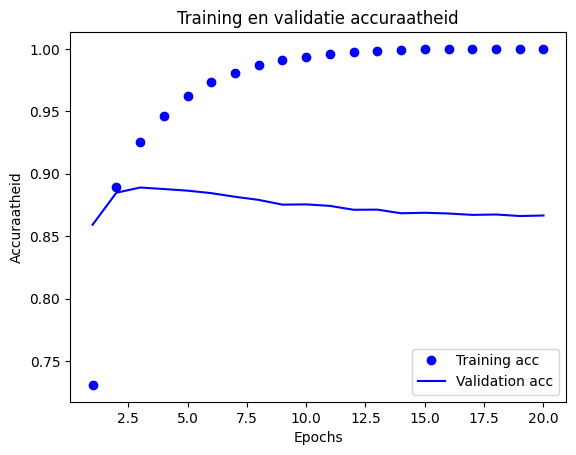

In [32]:
# Haal de gegevens uit de history dictionary
history_dict = history.history
train_accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']
epochs = range(1, len(train_accuracy) + 1)

# Plot de learning curve
plt.plot(epochs, train_accuracy, 'bo', label='Training acc')
plt.plot(epochs, val_accuracy, 'b', label='Validation acc')
plt.title('Training en validatie accuraatheid')
plt.xlabel('Epochs')
plt.ylabel('Accuraatheid')
plt.legend()

plt.show()

Plot een foutcurve. Zet de loss uit tegen de epochs en maak onderscheid tussen de training en validatie data. Bekijk of er misschien sprake is van overfitting/underfitting.

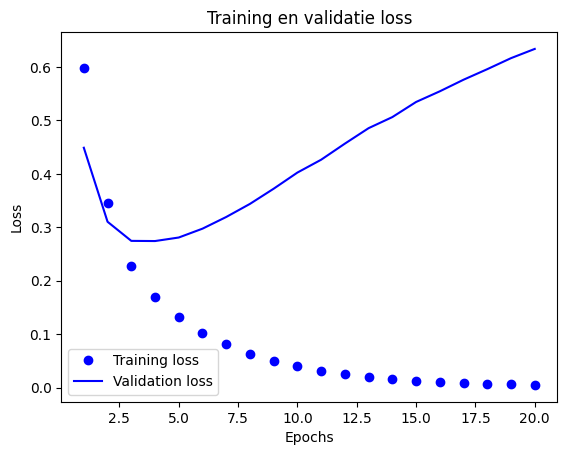

In [33]:

# Haal de gegevens uit de history dictionary
history_dict = history.history
train_loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(train_loss) + 1)

# Plot de foutcurve
plt.plot(epochs, train_loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training en validatie loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Test je model

In [31]:
# Stap 8: Model testen
results = model.evaluate(X_test, y_test)
print(results)

782/782 [==============================] - 3s 4ms/step - loss: 0.6927 - accuracy: 0.8537
[0.6927394270896912, 0.8537200093269348]


Kijk wat er gebeurt met de foutcurves van de train en validatiedata en met de testscore als je verschillende netwerken maakt met verschillende instellingen (aantal lagen, aantal neuronen, optimizer).

In [37]:
model_1 = models.Sequential()
model_1.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model_1.add(layers.Dense(64, activation='relu'))
model_1.add(layers.Dense(1, activation='sigmoid'))

model_1.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])

history_1 = model_1.fit(partial_X_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(X_val, y_val))

# Haal de gegevens uit de history dictionary
history_dict_1 = history_1.history
train_loss_1 = history_dict_1['loss']
val_loss_1 = history_dict_1['val_loss']
epochs_1 = range(1, len(train_loss_1) + 1)



Epoch 1/20
30/30 [==============================] - 4s 62ms/step - loss: 0.4615 - accuracy: 0.8027 - val_loss: 0.2838 - val_accuracy: 0.8878
Epoch 2/20
30/30 [==============================] - 1s 29ms/step - loss: 0.2010 - accuracy: 0.9254 - val_loss: 0.2760 - val_accuracy: 0.8914
Epoch 3/20
30/30 [==============================] - 1s 27ms/step - loss: 0.1222 - accuracy: 0.9609 - val_loss: 0.3149 - val_accuracy: 0.8838
Epoch 4/20
30/30 [==============================] - 1s 25ms/step - loss: 0.0751 - accuracy: 0.9793 - val_loss: 0.3670 - val_accuracy: 0.8802
Epoch 5/20
30/30 [==============================] - 1s 25ms/step - loss: 0.0424 - accuracy: 0.9900 - val_loss: 0.4280 - val_accuracy: 0.8742
Epoch 6/20
30/30 [==============================] - 1s 25ms/step - loss: 0.0211 - accuracy: 0.9972 - val_loss: 0.4924 - val_accuracy: 0.8733
Epoch 7/20
30/30 [==============================] - 1s 26ms/step - loss: 0.0094 - accuracy: 0.9996 - val_loss: 0.5484 - val_accuracy: 0.8702
Epoch 8/20
30

In [38]:
model_2 = models.Sequential()
model_2.add(layers.Dense(128, activation='relu', input_shape=(10000,)))
model_2.add(layers.Dense(128, activation='relu'))
model_2.add(layers.Dense(128, activation='relu'))
model_2.add(layers.Dense(1, activation='sigmoid'))

model_2.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['accuracy'])

history_2 = model_2.fit(partial_X_train,
                        partial_y_train,
                        epochs=20,
                        batch_size=512,
                        validation_data=(X_val, y_val))

# Haal de gegevens uit de history dictionary
history_dict_2 = history_2.history
train_loss_2 = history_dict_2['loss']
val_loss_2 = history_dict_2['val_loss']
epochs_2 = range(1, len(train_loss_2) + 1)



Epoch 1/20
30/30 [==============================] - 4s 73ms/step - loss: 0.5496 - accuracy: 0.7208 - val_loss: 0.4128 - val_accuracy: 0.8122
Epoch 2/20
30/30 [==============================] - 1s 39ms/step - loss: 0.3271 - accuracy: 0.8620 - val_loss: 0.2743 - val_accuracy: 0.8913
Epoch 3/20
30/30 [==============================] - 1s 39ms/step - loss: 0.2362 - accuracy: 0.9083 - val_loss: 0.2705 - val_accuracy: 0.8886
Epoch 4/20
30/30 [==============================] - 1s 38ms/step - loss: 0.1777 - accuracy: 0.9309 - val_loss: 0.2805 - val_accuracy: 0.8873
Epoch 5/20
30/30 [==============================] - 1s 38ms/step - loss: 0.1438 - accuracy: 0.9482 - val_loss: 0.2815 - val_accuracy: 0.8898
Epoch 6/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1003 - accuracy: 0.9683 - val_loss: 0.3281 - val_accuracy: 0.8874
Epoch 7/20
30/30 [==============================] - 1s 37ms/step - loss: 0.0773 - accuracy: 0.9775 - val_loss: 0.3674 - val_accuracy: 0.8859
Epoch 8/20
30

In [39]:
model_3 = models.Sequential()
model_3.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model_3.add(layers.Dense(1, activation='sigmoid'))

model_3.compile(optimizer='sgd',
                loss='binary_crossentropy',
                metrics=['accuracy'])

history_3 = model_3.fit(partial_X_train,
                        partial_y_train,
                        epochs=20,
                        batch_size=512,
                        validation_data=(X_val, y_val))

# Haal de gegevens uit de history dictionary
history_dict_3 = history_3.history
train_loss_3 = history_dict_3['loss']
val_loss_3 = history_dict_3['val_loss']
epochs_3 = range(1, len(train_loss_3) + 1)


Epoch 1/20
30/30 [==============================] - 3s 52ms/step - loss: 0.6890 - accuracy: 0.5439 - val_loss: 0.6847 - val_accuracy: 0.5744
Epoch 2/20
30/30 [==============================] - 1s 21ms/step - loss: 0.6807 - accuracy: 0.5988 - val_loss: 0.6760 - val_accuracy: 0.6212
Epoch 3/20
30/30 [==============================] - 1s 20ms/step - loss: 0.6709 - accuracy: 0.6421 - val_loss: 0.6656 - val_accuracy: 0.6513
Epoch 4/20
30/30 [==============================] - 1s 19ms/step - loss: 0.6594 - accuracy: 0.6772 - val_loss: 0.6535 - val_accuracy: 0.6904
Epoch 5/20
30/30 [==============================] - 1s 17ms/step - loss: 0.6467 - accuracy: 0.7139 - val_loss: 0.6406 - val_accuracy: 0.7126
Epoch 6/20
30/30 [==============================] - 1s 17ms/step - loss: 0.6332 - accuracy: 0.7316 - val_loss: 0.6268 - val_accuracy: 0.7455
Epoch 7/20
30/30 [==============================] - 1s 18ms/step - loss: 0.6192 - accuracy: 0.7542 - val_loss: 0.6126 - val_accuracy: 0.7649
Epoch 8/20
30

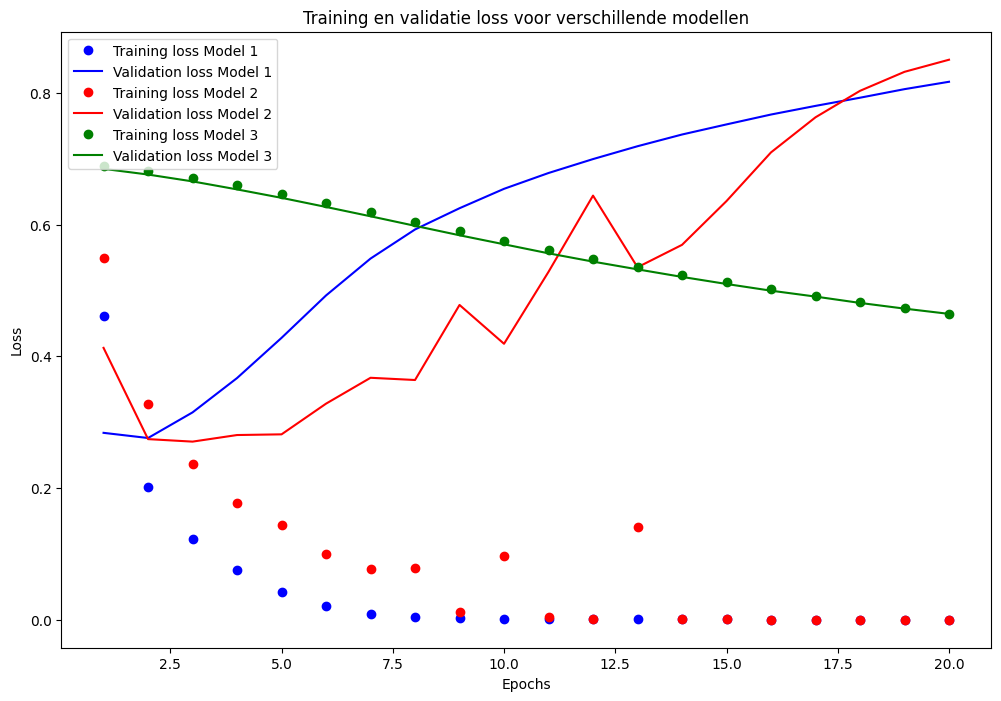

In [40]:
# Plot de foutcurves voor elk model
plt.figure(figsize=(12, 8))

plt.plot(epochs_1, train_loss_1, 'bo', label='Training loss Model 1')
plt.plot(epochs_1, val_loss_1, 'b', label='Validation loss Model 1')

plt.plot(epochs_2, train_loss_2, 'ro', label='Training loss Model 2')
plt.plot(epochs_2, val_loss_2, 'r', label='Validation loss Model 2')

plt.plot(epochs_3, train_loss_3, 'go', label='Training loss Model 3')
plt.plot(epochs_3, val_loss_3, 'g', label='Validation loss Model 3')

plt.title('Training en validatie loss voor verschillende modellen')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


Bonusvraag: Zoek uit wat dropout lagen voor deep learning zijn en experimenteer met dropout lagen in jouw netwerk. Welke effect heeft dit op de resultaten?